# TCC 
## Algoritimo de classificação do tipo árvore de decisão

In [1]:
#Aqui vamos instanciar, treinar e otimizar os parâmetros somente da árvore de decisão nesse notbook
# Começando pelos imports necessários para a produção do algoritimo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import confusion_matrix

In [2]:
#Importando a base de dados e à armazenamos na variavel base
base = pd.read_excel('base_10_steps.xlsm')

In [3]:
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,Fcc,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,Fcc,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,Fcc,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,Fcc,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Verificando quantas fases eu tenho na coluna de "phase_name"
base['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma', 'Fcc+Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Sigma', 'Fcc+Bcc', 'Bcc+Fcc', 'Bcc', 'MnNi_Beta+Fcc',
       'Bcc+MnNi_Beta', 'Sigma+Fcc+MnNi_Beta', 'Bcc+Sigma',
       'Bcc+Fcc+Sigma', 'MnNi_Beta+Bcc', 'Bcc+MnNi_Beta+Sigma',
       'MnNi_Beta+Bcc+Fcc', 'Fcc+CUB_A13', 'Sigma+CUB_A13',
       'Fcc+Bcc+Sigma', 'CUB_A13+Sigma+Fcc'], dtype=object)

In [5]:
# Criando um dicionário com as fases existentes na base. Cada fase será agrupado com um número.
valores_de_fase = { 'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
       'CUB_A13+Sigma':3, 'Fcc+Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
       'Sigma+Fcc':3, 'Sigma':2, 'Fcc+Bcc':3, 'Bcc+Fcc':3, 'Bcc':1, 'MnNi_Beta+Fcc':3,
       'Bcc+MnNi_Beta':3, 'Sigma+Fcc+MnNi_Beta':3, 'Bcc+Sigma':3,
       'Bcc+Fcc+Sigma':3, 'MnNi_Beta+Bcc':3, 'Bcc+MnNi_Beta+Sigma':3,
       'MnNi_Beta+Bcc+Fcc':3, 'Fcc+CUB_A13':3, 'Sigma+CUB_A13':3,
       'Fcc+Bcc+Sigma':3, 'CUB_A13+Sigma+Fcc':3
    
}

In [6]:
#Mudando os nomes das fases pelos números correspondentes em nossa base

base['phase_name'] = base['phase_name'].map(valores_de_fase)

In [7]:
#Verificando a alteração na nomeclatura das fases
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Substituindo os valores vazios (NaN) por zero

base = base.fillna(0)
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,0.0,0.0,0.0,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,0.0,0.0,0.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,0.0,0.0,0.0,9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,0.0,0.0,0.0,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Analisando tamanho da base
base.shape

(1001, 117)

In [10]:
#Criando bases de Features (caracteristicas -->x ) e Resposta (classes --> y)
#x é a base de caracteristicas apenas com os elementos 
# x_2 é a base que considera além dos elementos, considera a concentração dos eletrosn de valência (VEC)
# x_3 considera os elementos, o VEC e a entropia configuracional (Sc)

x = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y= base[['phase_name']]

In [11]:
#Fazer separação para treino e teste usando a divisão mais simples de train_test_split (onde o tamanho do
# grupo de teste é de 25% -->0.25)
#Como o modelo aqui será uma árvore de decisão, não é necessário a normalização (deixar os dados em uma mesma escala)


SEED=10

x_treino,x_teste,y_treino,y_teste = train_test_split(x, y, test_size=0.25, 
                                                     random_state=SEED, stratify=y)

x2_treino,x2_teste,y2_treino,y2_teste = train_test_split(x_2, y, test_size=0.25, 
                                                     random_state=SEED, stratify=y)

x3_treino,x3_teste,y3_treino,y3_teste = train_test_split(x_3, y, test_size=0.25, 
                                                     random_state=SEED, stratify=y)

### Criação de modelos (Dummy e Árvore de decisão)

In [12]:
#Criação de um "Modelo bobo" para classificação e obtenção de uma baseline
#Como modelo usarei um Dummy estratificado (esse modelo serve para termos uma referencia mínima de precisão)

Dummy = DummyClassifier(strategy='stratified',random_state=SEED)

#Aqui realizo o treinamento do algoritmo bobo, utilizando o fit

Dummy.fit(x_treino,y_treino)
#após treinado fazemos o teste do algoritimo testato sua capacidade de classificação para previsões por meio do predict

previsao_dummy = Dummy.predict(x_teste)

#com o accuracy score, realizamos a apuração entre o que o algoritmo previu e as respostas (classes) reais
#armazenadas em y

acuracia_dummy = accuracy_score(y_teste,previsao_dummy)

#por fim realizamos um print do valore de precisão, ou seja, o percentual total de acertividade das respostas.

print('A acurácia do modelo "Bobo" foi de %.2f' % (acuracia_dummy*100),'%')

A acurácia do modelo "Bobo" foi de 51.00 %


## Criação inicial do algoritimo de Árvore de decisão

In [13]:
#Criação de um modelo de árvore de decisão com profundidade 3 (max_depth) e utilizando como 
# crítério para classificação a entropia

arvore_decisao = DecisionTreeClassifier(criterion='entropy',random_state=SEED,max_depth=3)

#Treinamento do algoritmo

arvore_decisao.fit(x_treino,y_treino)

#Aplicação nos dados desconhecidos

previsao_arvore = arvore_decisao.predict(x_teste)

#apuração dos resultados
acuracia_arvore = accuracy_score(y_teste,previsao_arvore)

#impressão da precisão alcançada
print('A acurácia do modelo de árvore de decisão foi de %.2f' % (acuracia_arvore*100),'%')

A acurácia do modelo de árvore de decisão foi de 80.08 %


In [14]:
#verificando "importancia" das features para classificação no modelo de árvore, através dos valores 
# de entropia de cada feature

arvore_decisao.feature_importances_

array([0.13779941, 0.08700124, 0.01467234, 0.64827344, 0.11225358])

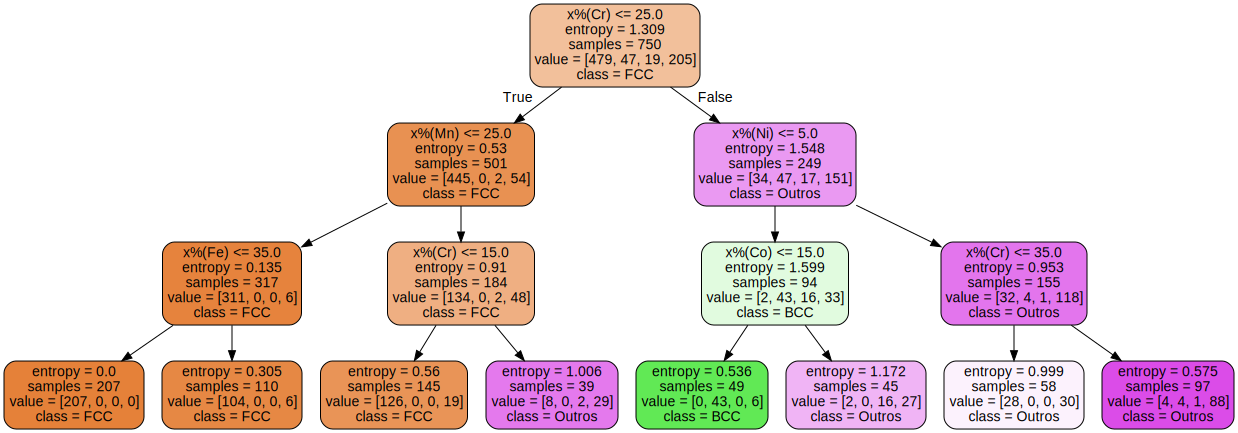

In [15]:
#imprimindo a árvore de decisão para visualização

#agrupando os rótulos das colunas da base de dados para passar a árvore as features usadas
informacoes_da_arvore = x.columns

#criação das informações gráfico, onde passamos o modelo (arvore de decisão),  
# os rótulos das features e o nome de cada classe #conforme criado anteriormente
dot_data = export_graphviz(arvore_decisao, out_file=None, filled=True, rounded=True,
                          feature_names=informacoes_da_arvore, class_names={0:'FCC',1:'BCC', 2:'Sigma',3:'Outros'})

#criação e impressão do gráfico no modelo de árvore de decisão
grafico= graphviz.Source(dot_data)
grafico

## Otimização e validação do modelo -->Validação cruzada do modelo

In [16]:
# Realização da validação cruzada para o modelo de árvore de decisão, com divisão em 10 partes (cv = 10)

resultados_arvore = cross_validate(arvore_decisao, x, y, cv= 10)
resultados_arvore

{'fit_time': array([0.00798035, 0.00798106, 0.0079813 , 0.00697923, 0.00897312,
        0.00398993, 0.00598145, 0.00598431, 0.00598025, 0.00498605]),
 'score_time': array([0.00398922, 0.00399065, 0.00498176, 0.00299478, 0.00100255,
        0.00099802, 0.00299191, 0.00199556, 0.00199342, 0.00099754]),
 'test_score': array([0.73267327, 0.7       , 0.89      , 0.88      , 0.8       ,
        0.82      , 0.84      , 0.91      , 0.82      , 0.91      ])}

In [17]:
#Acima temos o modelo de árvore sendo executado com profundidade igual 3, 10 vezes (parâmetro cv define isso), 
#como resultado temos 10 acurácias, possibilitando a criação de um desvio padrão.
#Além disso ela retorna o tempo de execusão em score time, e o tempo para executar com cada divsão feita (fit_time)

In [18]:
#Agora fazemos um cálculo da média e desvio padrão com as informações do test_score
#média
media_arvore = resultados_arvore['test_score'].mean()

#desvio padrão
desvio_arvore = resultados_arvore['test_score'].std()

#impressão do resultado do modelo com uma maior precisão, contendo a média e o desvio padrão
print('A acurácia utilizando o modelo de árvore de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_arvore*100 
                                                                                              ,desvio_arvore*100))

A acurácia utilizando o modelo de árvore de decisão foi de 83.03% ± 6.82%


#### Validação cruzada com uma divisão não deterministica (de forma aleatória)

In [19]:
    #A divisão feita pelo cross_validade não recebe o parâmetro de aleatoriedade, assim o que ele faz é 
    # a quebra em n pedaços, porém de forma determinística.
    # onde sabemos quantas divisões são, pois passamos essa informação a função.
    #Dessa forma o melhor é embaralhar os dados para fazer a validação cruzada, faremos isso utilizando o K-fold
    #Para o Kfold passamos o número de divisões em n_splits e,
    # o parâmetro de embaralhamento (Shuffe) como True (verdadeiro)

np.random.seed(SEED)
#criando a validação cruzada com parâmetro de embaralhamento
cv_arevore_kfold = KFold(n_splits=10, shuffle=True)

#executando a validação cruzada com os parâmetros necessarios
resultados_arvore_kfold = cross_validate(arvore_decisao, x, y, cv=cv_arevore_kfold, return_train_score=False)

#aplicação do cálculo da média e desvio padrão
media_arvore_kfold = resultados_arvore_kfold['test_score'].mean()
desvio_arvore_kfold = resultados_arvore_kfold['test_score'].std()

#impressão dos resultados
print('A acurácia utilizando o modelo de árvore de decisão com KFold foi de {0:.2f}% ± {1:.2f}%'.format(media_arvore_kfold*100 
                                                                                              ,desvio_arvore_kfold*100))

A acurácia utilizando o modelo de árvore de decisão com KFold foi de 84.92% ± 4.76%


In [20]:
#Apesar de acima termos o embaralhamento dos dados com o shuffe, 
# pode ser interessante ainda sim realizar a estratificação 
# (manter a proporção de classes nos dados de teste e treino) dos dados

#criação da validação cruzada com embaralhamento e estratificação

cv_arevore_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

#executando a validação cruzada com os parâmetros necessarios

resultados_arvore_skfold = cross_validate(arvore_decisao, x, y, cv=cv_arevore_skfold, return_train_score=False)

#cálculo da média e desvio padrão
media_arvore_skfold = resultados_arvore_skfold['test_score'].mean()
desvio_arvore_skfold = resultados_arvore_skfold['test_score'].std()

#impressão dos resulados
print('A acurácia utilizando o modelo de árvore de decisão com StratifiedKFold foi de {0:.2f}% ± {1:.2f}%'.format(media_arvore_skfold*100 
                                                                                              ,desvio_arvore_skfold*100))

A acurácia utilizando o modelo de árvore de decisão com StratifiedKFold foi de 85.32% ± 3.13%


## Otimização do modelo --> seleção de hiperparâmetros


In [21]:
#Para exemplificar a otimização é mais interessante colocar nosso processo como se fosse uma função, 
# assim podemos fazer uma def.

def modelo_arvore(max_depth):
    cv_arevore_skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
    modelo= DecisionTreeClassifier(criterion='entropy',random_state=SEED,max_depth=max_depth)
    resultados_arvore_skfold2 = cross_validate(modelo, x, y, cv=cv_arevore_skfold, return_train_score=True)
    train_score_arvore = resultados_arvore_skfold2['train_score'].mean()*100
    test_score_arvore = resultados_arvore_skfold2['test_score'].mean()*100
    desvio_arvore_skfold = resultados_arvore_skfold2['test_score'].std()
    #print('Modelo de Árvore com max_depth = {0}, treino={1:.2f}, teste{2:.5f}'.format(max_depth,train_score_arvore,test_score_arvore))
    tabela_arvore = [max_depth,train_score_arvore,test_score_arvore]
    return tabela_arvore

In [22]:
#A fim de exemplificar, vamos otimizar o hiperparâmetro do max_depth da árvore, variando sua profundidade

#aplicação do .timr para medir o tempo de execusão
tic = time.time()
#Execussão do modelo de árvore variando o max_depth de 1 a 32
results = [modelo_arvore(i) for i in range (1,33)]
results = pd.DataFrame(results, columns=['max_depth','train','test'])
tac= time.time()

#impressão do tempo de execução e desempenho do modelo conforme a variação da profundidade
print('Tempo de otimização do max_depth é', (tac-tic),'s')
results.head()

Tempo de otimização do max_depth é 3.682161569595337 s


,max_depth,train,test
0,1,78.421667,78.428713
1,2,79.820237,79.824752
2,3,85.658861,85.319802
3,4,86.802084,83.819802
4,5,92.185633,86.317822


<AxesSubplot:xlabel='max_depth', ylabel='train'>

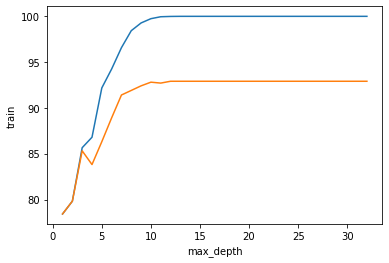

In [23]:
#Impressão do o gráfico da mudança de desempenho conforme mudamos o max_depyh

#linha do gráfico do desempenho do treino em função da profundidade
sns.lineplot(x='max_depth', y='train', data=results)

#linha do gráfico do desempenho do teste em função da profundidade
sns.lineplot(x='max_depth', y='test', data=results)

In [24]:
# Elencando os melhores valores para max_depth
results.sort_values('test', ascending=False).head()

,max_depth,train,test
16,17,100.0,92.912871
17,18,100.0,92.912871
30,31,100.0,92.912871
29,30,100.0,92.912871
28,29,100.0,92.912871


## Otimização de todos os hiperparâmetros por meio da  exploração aleatória de hiperparâmetros

In [25]:
#Varrer todos os hiperparâmetos pode exigir muito processualmente, para isso podemos fazer uma exploração
#  de modo aleatório no modelo
#Com isso podemos encontrar parâmetros que melhor otimizam o modelo usando o RandomizeSearch

#espaço de parâmetros a ser otimizado

espaco_de_parametros= {
    'criterion': ["gini", "entropy"],
    'max_depth': randint(3,25),
    'min_samples_split': randint(10,200),
    'min_samples_leaf': randint (10,200)
}

tic =time.time()

#instanciar a busca aleatória e definir seus parâmetros, onde mostramos o modelo a ser usado
# parâmetros a serem varridos, o número de modelos que queremos explorar (em n_iter = 100),
# a validação a ser feita para cada modelo(validação cruzada com embaralhamento e estratificação )
busca = RandomizedSearchCV(DecisionTreeClassifier(),espaco_de_parametros, n_iter=100,
                          cv=cv_arevore_kfold, random_state=SEED)

#execussão da varredura aleatória, passando as features e classes
busca.fit(x,y)
tac =time.time()
tempo_que_passou = tac-tic

#imressão do tempo decorrido, criação e impressão de DataFrame com os resultados obtidos da busca aleatória
print('O tempo para analise dessa busca foi de', tempo_que_passou,' segundos')
results_randomize = pd.DataFrame(busca.cv_results_)
results_randomize

O tempo para analise dessa busca foi de 9.361977577209473  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016755,0.030026,0.002895,0.001446,entropy,7,25,74,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.851485,...,0.87,0.89,0.85,0.84,0.88,0.78,0.77,0.850149,0.041475,8
1,0.004788,0.000870,0.002095,0.000535,entropy,19,167,123,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.811881,...,0.78,0.82,0.77,0.69,0.82,0.78,0.77,0.784188,0.036525,54
2,0.004288,0.001414,0.002294,0.001265,gini,11,83,10,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",0.831683,...,0.81,0.80,0.80,0.76,0.84,0.80,0.76,0.798168,0.025041,15
3,0.006782,0.001934,0.003092,0.001134,gini,11,174,125,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",0.811881,...,0.78,0.82,0.77,0.69,0.82,0.78,0.77,0.784188,0.036525,54
4,0.007579,0.002370,0.002992,0.000893,gini,7,149,64,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.811881,...,0.78,0.82,0.77,0.69,0.82,0.78,0.77,0.784188,0.036525,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.006183,0.002221,0.003690,0.001997,gini,16,94,158,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.831683,...,0.81,0.80,0.80,0.76,0.84,0.80,0.76,0.798168,0.025041,15
96,0.009971,0.003338,0.003890,0.001296,entropy,4,140,107,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.811881,...,0.78,0.82,0.77,0.69,0.82,0.78,0.77,0.784188,0.036525,54
97,0.006981,0.003511,0.002495,0.000669,gini,15,92,76,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.831683,...,0.81,0.80,0.80,0.76,0.84,0.80,0.76,0.798168,0.025041,15
98,0.003691,0.000779,0.002393,0.000798,entropy,20,97,136,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.831683,...,0.81,0.80,0.80,0.76,0.84,0.80,0.76,0.798168,0.025041,15


In [26]:
#Impressão do melhor modelo de árvore entre os explorados com base na precisão do modelo
melhor=busca.best_estimator_
print(melhor)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=19,
                       min_samples_split=17)


In [27]:
# Criação de função para imprimir o desempenho e os desvios padrões

def imprime_score(scores):
    media=scores.mean()*100
    desvio=scores.std()*100
    print('Acurácia de {0:.2f}'.format(media))
    print('intervalo de confiabilidade é de [{0:.2f},{1:0.2f}]'.format((media-desvio),(media+desvio)))

In [28]:
#Impressão dos resultados do melhor modelo de árvore achado
scores_do_melhor_arvore = cross_val_score(melhor,x,y, cv=cv_arevore_kfold)
imprime_score(scores_do_melhor_arvore)

Acurácia de 89.01
intervalo de confiabilidade é de [85.73,92.29]


In [29]:
#Ordenando e visualizando os resultados de todos os modelos gerados por ordem decrescente de precisão

reultados_ordenados_pela_media = results_randomize.sort_values('mean_test_score', ascending=False)

#rodando o ordenamento para cada linha do DataFrame construido
for indice,linha in reultados_ordenados_pela_media.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

88.509 ± 2.664, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 19, 'min_samples_split': 17}
88.109 ± 4.140, {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 29, 'min_samples_split': 51}
88.009 ± 4.130, {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 28}
87.108 ± 3.791, {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 19, 'min_samples_split': 37}
86.910 ± 5.035, {'criterion': 'gini', 'max_depth': 21, 'min_samples_leaf': 33, 'min_samples_split': 13}
86.113 ± 2.667, {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 21, 'min_samples_split': 51}
86.015 ± 2.715, {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 22, 'min_samples_split': 72}
85.015 ± 4.148, {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 74}
84.510 ± 4.812, {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 25, 'min_samples_split': 98}
83.312 ± 4.508, {'criterion': 'gini', 'max_depth': 3,

In [30]:
#Treinamento do mlehor modelo, com todos os dados
melhor.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=19,
                       min_samples_split=17)

# Teste real --> usando o melhor classicifador
#### Nesse teste pegamos uma outra base de dados com um step diferente para aplicar e medir o desempenho do algortimo encontrado

In [31]:
#Importação da base desconhecida para testes, bases onde o step foi 5 (essa base é desconhecida pelo modelo treinado)
base_teste = pd.DataFrame(pd.read_excel('base_8_steps.xlsm'))

In [32]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,Fcc,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,Fcc,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,Fcc,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,Fcc,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Identificando as fases existentes nessa base
base_teste['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma+Fcc', 'Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Bcc+Sigma', 'Fcc+Bcc', 'Fcc+Bcc+Sigma', 'Sigma',
       'Bcc', 'MnNi_Beta+Bcc', 'Bcc+Fcc', 'MnNi_Beta+Bcc+Fcc',
       'Bcc+MnNi_Beta+Sigma', 'Bcc+MnNi_Beta', 'Fcc+Sigma+CUB_A13',
       'CUB_A13+Sigma', 'Bcc+Fcc+Sigma'], dtype=object)

In [34]:
# Crinado dicionário para substituir as fases da base nova para os números considerados pelo modelo
valores_de_fase_teste = {
    'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
    'CUB_A13+Sigma+Fcc':3,'Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
    'Sigma+Fcc':3, 'Bcc+Sigma':3, 'Fcc+Bcc':3, 'Fcc+Bcc+Sigma':3, 'Sigma':2,
    'Bcc':1, 'MnNi_Beta+Bcc':3, 'Bcc+Fcc':3, 'MnNi_Beta+Bcc+Fcc':3,
    'Bcc+MnNi_Beta+Sigma':3, 'Bcc+MnNi_Beta':3, 'Fcc+Sigma+CUB_A13':3,
    'CUB_A13+Sigma':3, 'Bcc+Fcc+Sigma':3
}

In [35]:
#Mudando os nomes das fases pelos números correspondentes

base_teste['phase_name'] = base_teste['phase_name'].map(valores_de_fase_teste)

In [36]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Substituição dos dados vazios por zero
base_teste= base_teste.fillna(0)
base_teste.head()


,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,0.0,0.0,0.0,9.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,0.0,0.0,0.0,9.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,0.0,0.0,0.0,8.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,0.0,0.0,0.0,8.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#verificando tamanho da nova base
base_teste.shape

(495, 116)

In [39]:
#Criando bases de Features e Resposta

x_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y_base_teste= base_teste[['phase_name']]

In [40]:
#Aplicação do melhor modelo para previsão, em cima dos dados desconhecidos

previsao_do_melhor = melhor.predict(x_base_teste)
acuracia_em_dados_desconhecidos = accuracy_score(y_base_teste, previsao_do_melhor)
print("A acurácia do melhor modelo de árvore de decisão para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos*100))

A acurácia do melhor modelo de árvore de decisão para dados desconhecidos é de 88.48 %


In [41]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos = confusion_matrix(y_base_teste,previsao_do_melhor)
matriz_confusão_desconhecidos

array([[304,   0,   0,  11],
       [  3,  33,   0,   0],
       [  0,   0,   0,  14],
       [ 26,   3,   0, 101]], dtype=int64)

In [42]:
#Averiquação de ocorrencias de cada fase na base de dados selecionada para conparação com matriz de confusão
ocorrencia_fases = y_base_teste.groupby(['phase_name']).size()
ocorrencia_fases

phase_name
0    315
1     36
2     14
3    130
dtype: int64

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

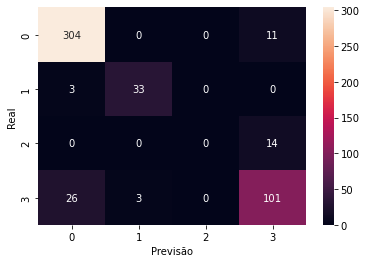

In [43]:
#criação de uma matriz de confusão mais visual

sns.set
#criação do mapa de calor, onde passamos a matriz de confusão e o nome dos eixos
sns.heatmap(matriz_confusão_desconhecidos, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')

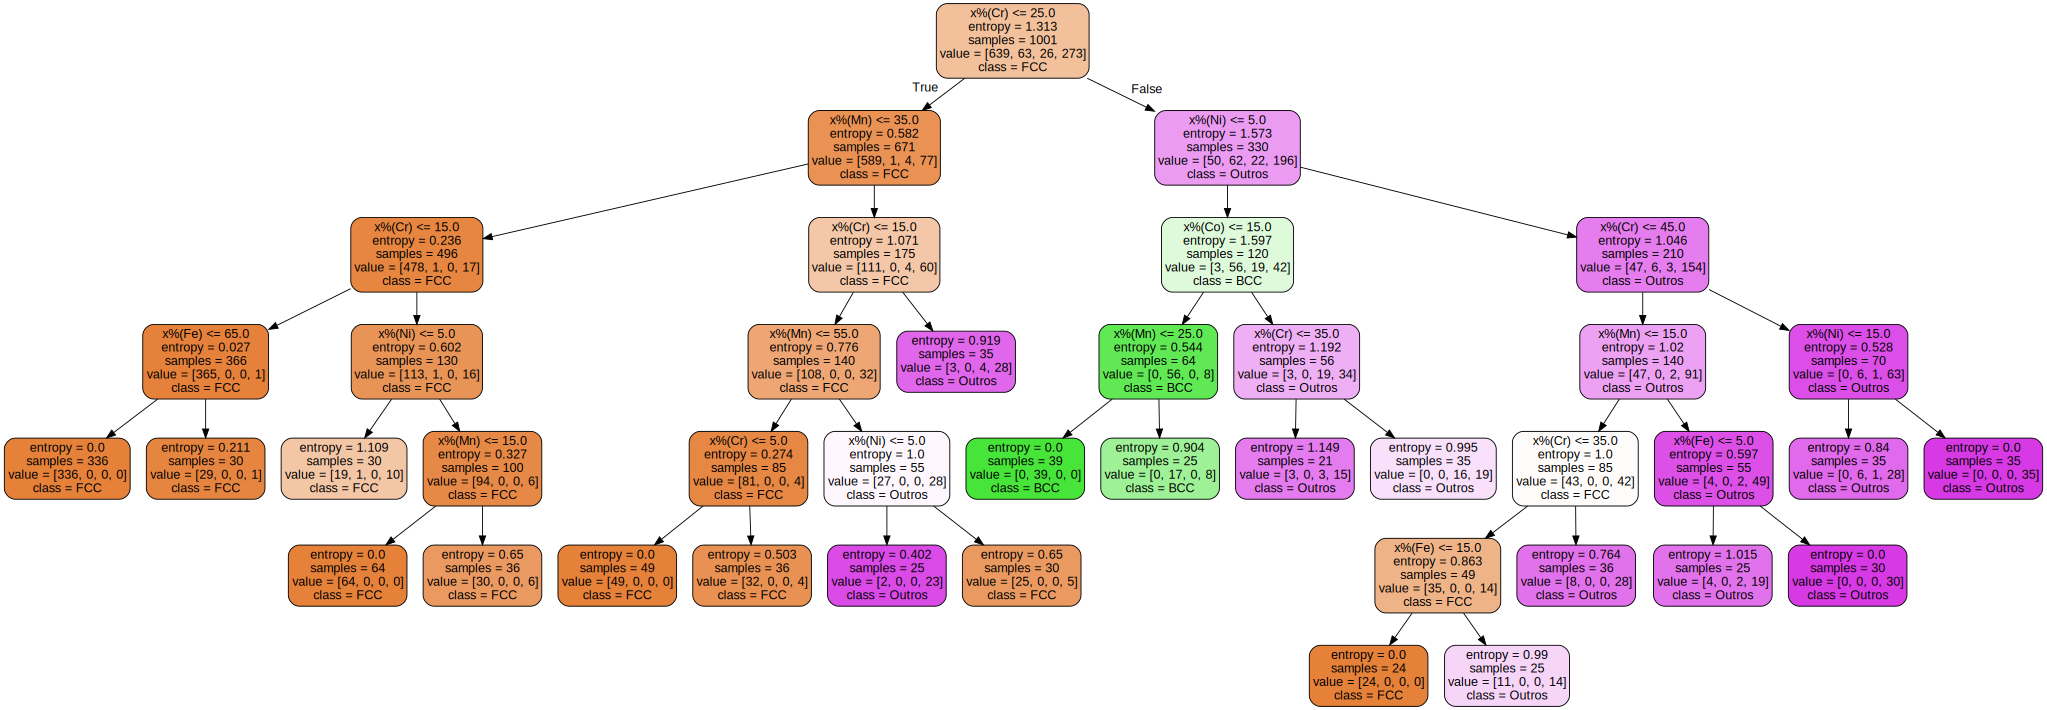

In [44]:
#imprimindo a melhor árvore de decisão

informacoes_da_melhor = x_base_teste.columns

dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          feature_names=informacoes_da_arvore, class_names={0:'FCC',1:'BCC', 2:'Sigma',3:'Outros'})

grafico= graphviz.Source(dot_data)
grafico

## Repetição de parte do Processo para o melhor modelo de árvore, considerando agora também o VEC como uma feature
### Vamos realizar outra busca nos hiperparametros considerando o novo conjunto de features

In [45]:
# Partiremos da validação cruzada com um conjunto de features contend o VEC

#lembrando que o conjunto de features que contém o VEC é o x_2
resultados_arvore2 = cross_validate(arvore_decisao, x_2, y, cv= 10)
resultados_arvore2

{'fit_time': array([0.00897694, 0.00897622, 0.0079782 , 0.00897455, 0.0099721 ,
        0.00697756, 0.00698018, 0.0069828 , 0.00498796, 0.00698042]),
 'score_time': array([0.00398684, 0.00398946, 0.00299191, 0.00299215, 0.00299382,
        0.00199771, 0.0019958 , 0.00299287, 0.00299096, 0.00199556]),
 'test_score': array([0.79207921, 0.78      , 0.87      , 0.87      , 0.78      ,
        0.87      , 0.84      , 0.86      , 0.81      , 0.84      ])}

In [46]:
#Agora farei um cálculo da média e desvio padrão com as informações do tes_score
media_arvore2 = resultados_arvore2['test_score'].mean()
desvio_arvore2 = resultados_arvore2['test_score'].std()
print('A acurácia utilizando o modelo de árvore de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_arvore2*100 
                                                                                              ,desvio_arvore2*100))

A acurácia utilizando o modelo de árvore de decisão foi de 83.12% ± 3.57%


In [47]:
#Agora vamos fazer a valdação cruzada usando um embaralhador e mantendo a proporção das respostas

cv_arvore_skfold2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
resultados_arvore_skfold2 = cross_validate(arvore_decisao, x_2, y, cv=cv_arvore_skfold2, return_train_score=False)
media_arvore_skfold2 = resultados_arvore_skfold2['test_score'].mean()
desvio_arvore_skfold2 = resultados_arvore_skfold2['test_score'].std()
print('A acurácia utilizando o modelo de árvore de decisão com StratifiedKFold foi de {0:.2f}% ± {1:.2f}%'.format(media_arvore_skfold2*100 
                                                                                              ,desvio_arvore_skfold2*100))

A acurácia utilizando o modelo de árvore de decisão com StratifiedKFold foi de 83.61% ± 4.76%


#### Otimização do modelo utilizando a base de features com o VEC


In [48]:
#Varredura de parâmetros que melhor otimizam o modelo usando o RandomizeSearch

espaco_de_parametros2= {
    'criterion': ["gini", "entropy"],
    'max_depth': randint(3,25),
    'min_samples_split': randint(10,300),
    'min_samples_leaf': randint (10,300)
}

tic2 =time.time()
busca2 = RandomizedSearchCV(DecisionTreeClassifier(),espaco_de_parametros2, n_iter=200,
                          cv=cv_arvore_skfold2, random_state=SEED)

busca2.fit(x_2,y)

tac2 =time.time()
tempo_que_passou2 = tac2-tic2

print('O tempo para analise dessa busca foi de', tempo_que_passou,' segundos')
results_randomize2 = pd.DataFrame(busca2.cv_results_)
results_randomize2

O tempo para analise dessa busca foi de 9.361977577209473  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005984,0.001411,0.003490,0.002056,entropy,7,25,133,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.861386,...,0.83,0.83,0.76,0.84,0.83,0.82,0.74,0.819139,0.036339,43
1,0.005585,0.002646,0.002194,0.001074,gini,19,18,83,"{'criterion': 'gini', 'max_depth': 19, 'min_sa...",0.831683,...,0.86,0.90,0.89,0.82,0.89,0.87,0.80,0.857168,0.030857,12
2,0.004089,0.000698,0.001696,0.000457,gini,13,50,26,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.831683,...,0.86,0.90,0.89,0.82,0.89,0.87,0.75,0.854168,0.042617,15
3,0.004787,0.000977,0.002793,0.001883,gini,18,64,132,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.861386,...,0.82,0.86,0.85,0.77,0.85,0.80,0.75,0.820139,0.037031,42
4,0.009076,0.007602,0.003691,0.001673,gini,4,210,187,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.821782,...,0.86,0.84,0.81,0.82,0.81,0.82,0.75,0.814178,0.026952,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.004189,0.000870,0.001999,0.000778,entropy,8,197,64,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.821782,...,0.82,0.84,0.79,0.82,0.81,0.82,0.75,0.808178,0.023250,129
196,0.004886,0.001696,0.002494,0.000803,entropy,9,148,207,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.821782,...,0.82,0.84,0.79,0.82,0.81,0.82,0.75,0.808178,0.023250,129
197,0.004389,0.001197,0.001894,0.000828,entropy,19,110,248,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.821782,...,0.82,0.84,0.79,0.82,0.81,0.82,0.75,0.808178,0.023250,129
198,0.004986,0.001179,0.001795,0.000747,entropy,10,29,78,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.831683,...,0.88,0.90,0.86,0.84,0.92,0.89,0.84,0.871168,0.029248,7


In [49]:
#Impressão do melhor modelo de árvore entre os explorados
melhor2=busca2.best_estimator_
print(melhor2)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=19,
                       min_samples_split=10)


In [50]:
#Imprimeindo resultados do melhor estimador
scores_do_melhor_arvore2 = cross_val_score(melhor2,x_2,y, cv=cv_arvore_skfold2)
imprime_score(scores_do_melhor_arvore2)

Acurácia de 89.91
intervalo de confiabilidade é de [85.73,94.09]


In [51]:
#Ordenando e visualizando os resultados de todos os modelos gerados

reultados_ordenados_pela_media2 = results_randomize2.sort_values('mean_test_score', ascending=False)
for indice,linha in reultados_ordenados_pela_media2.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

89.910 ± 4.182, {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 19, 'min_samples_split': 10}
89.308 ± 2.730, {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 15, 'min_samples_split': 73}
89.113 ± 3.136, {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 28, 'min_samples_split': 54}
88.410 ± 3.830, {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 68}
87.712 ± 1.954, {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 82}
87.317 ± 2.733, {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 38, 'min_samples_split': 68}
87.117 ± 2.925, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 29, 'min_samples_split': 78}
86.917 ± 2.315, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 79}
86.912 ± 3.020, {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 13, 'min_samples_split': 86}
86.517 ± 2.129, {'criterion': 'entropy', 'm

In [52]:
#Treinar o mlehor modelo, com todos os dados
melhor2.fit(x_2,y)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=19,
                       min_samples_split=10)

#### Teste na base desconhecida agora com o VEC como feature


In [53]:
#Aplicação do melhor modelo em cima dos dados desconhecidos

previsao_do_melhor2 = melhor2.predict(x_2_base_teste)
acuracia_em_dados_desconhecidos2 = accuracy_score(y_base_teste, previsao_do_melhor2)
print("A acurácia do melhor modelo de árvore de decisão para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos2*100))

A acurácia do melhor modelo de árvore de decisão para dados desconhecidos é de 91.72 %


In [54]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos2 = confusion_matrix(y_base_teste,previsao_do_melhor2)
matriz_confusão_desconhecidos2

array([[312,   0,   0,   3],
       [  0,  33,   0,   3],
       [  0,   0,   6,   8],
       [ 20,   3,   4, 103]], dtype=int64)

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

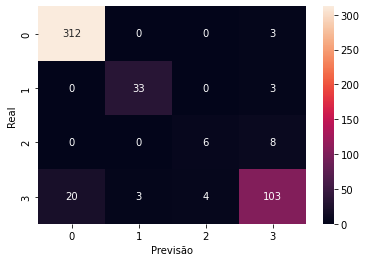

In [55]:
sns.set
#criação do mapa de calor, onde passamos a matriz de confusão e o nome dos eixos
sns.heatmap(matriz_confusão_desconhecidos2, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')